### Exercise: Scrape `unegui.mn`
* Scrape apartment listings from `https://www.unegui.mn/l-hdlh/l-hdlh-zarna/oron-suuts-zarna/`
* Use only the first page
  * Get the `listing title` and `listing price`
  * Make a dataframe and make a histogram using `listing price`

In [1]:
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
import requests
from bs4 import BeautifulSoup

In [2]:
# Your code here
response = requests.get("https://www.unegui.mn/l-hdlh/l-hdlh-zarna/oron-suuts-zarna/")

In [3]:
soup = BeautifulSoup(response.content)

In [4]:
soup

<!DOCTYPE html>
<html lang="mn">
<head>
<meta charset="utf-8"/>
<meta content="telephone=no" name="format-detection"/>
<link href="https://www.unegui.mn/static/favicons/favicon.ad97eb2fafd2.ico" rel="icon" type="image/x-icon"/>
<link href="https://www.unegui.mn/static/favicons/favicon.ad97eb2fafd2.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="https://www.unegui.mn/static/images/app-icons/unegui/57.96c37a4cf7cc.png" rel="apple-touch-icon"/>
<link href="https://www.unegui.mn/static/images/app-icons/unegui/57.96c37a4cf7cc.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="https://www.unegui.mn/static/images/app-icons/unegui/72.4d8e269ca67b.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="https://www.unegui.mn/static/images/app-icons/unegui/114.6af90caa6356.png" rel="apple-touch-icon" sizes="114x114"/>
<link href="https://www.unegui.mn/static/images/app-icons/unegui/120.2083a12e5343.png" rel="apple-touch-icon" sizes="120x120"/>
<link href="https://www.unegui.mn/sta

#### Getting the titles

In [5]:
list_titles = soup.find_all("a", {"class":"announcement-block__title"})

In [6]:
list_titles

[<a class="announcement-block__title" content="River plaza-–¥ 216–º–∫–≤ 5 ”©—Ä”©”©" href="/adv/7711140_river-plaza-d-5-oroo-khudaldana/" itemprop="name">
               River plaza-–¥ 216–º–∫–≤ 5 ”©—Ä”©”© 
             </a>,
 <a class="announcement-block__title" content="4-—Ä —Ö–æ—Ä–æ–æ–ª–æ–ª–¥ —Ö—É—É—á–Ω–∞–∞—Ä –æ–¥ –∫–∏–Ω–æ —Ç–µ–∞—Ç—Ä—ã–Ω —É—Ä–¥ –∑–∞–º –¥–∞–≥—É—É 3 ”©—Ä”©”© 40–º2 –±–∞–π—Ä" href="/adv/7708333_4-r-khoroolold-khuuchnaar-od-kino-teatryn-urd-zam-daguu-3-oroo-40m2-bair/" itemprop="name">
               4-—Ä —Ö–æ—Ä–æ–æ–ª–æ–ª–¥ —Ö—É—É—á–Ω–∞–∞—Ä –æ–¥ –∫–∏–Ω–æ —Ç–µ–∞—Ç—Ä—ã–Ω —É—Ä–¥ –∑–∞–º –¥–∞–≥—É—É 3 ”©—Ä”©”© 40–º2 –±–∞–π—Ä 
             </a>,
 <a class="announcement-block__title" content="–•–æ—Ç—ã–Ω —Ç”©–≤ —Ü–∏—Ä–∫ —Ö–∞–∂—É—É–¥ 1–∞ –±–∞–π—Ä 2 ”©—Ä”©”© –æ—Ä–æ–Ω —Å—É—É—Ü" href="/adv/7720294_khotyn-tov-tsirk-khazhuud-1a-bair-2-oroo-oron-suuts/" itemprop="name">
               –•–æ—Ç—ã–Ω —Ç”©–≤ —Ü–∏—Ä–∫ —Ö–∞–∂—É—É–¥ 1–∞ –±–∞–π—Ä 2 ”©—Ä”©”© –æ—Ä–æ–Ω —Å—É—É—Ü 
             </a>,
 <

In [7]:
list_titles[0]

<a class="announcement-block__title" content="River plaza-–¥ 216–º–∫–≤ 5 ”©—Ä”©”©" href="/adv/7711140_river-plaza-d-5-oroo-khudaldana/" itemprop="name">
              River plaza-–¥ 216–º–∫–≤ 5 ”©—Ä”©”© 
            </a>

In [9]:
list_titles[0].get_text().strip()

'River plaza-–¥ 216–º–∫–≤ 5 ”©—Ä”©”©'

In [10]:
list_titles = [x.get_text().strip() for x in list_titles]

In [11]:
list_titles

['River plaza-–¥ 216–º–∫–≤ 5 ”©—Ä”©”©',
 '4-—Ä —Ö–æ—Ä–æ–æ–ª–æ–ª–¥ —Ö—É—É—á–Ω–∞–∞—Ä –æ–¥ –∫–∏–Ω–æ —Ç–µ–∞—Ç—Ä—ã–Ω —É—Ä–¥ –∑–∞–º –¥–∞–≥—É—É 3 ”©—Ä”©”© 40–º2 –±–∞–π—Ä',
 '–•–æ—Ç—ã–Ω —Ç”©–≤ —Ü–∏—Ä–∫ —Ö–∞–∂—É—É–¥ 1–∞ –±–∞–π—Ä 2 ”©—Ä”©”© –æ—Ä–æ–Ω —Å—É—É—Ü',
 '–ë–æ–≥–¥ –∞—Ä —Ö–æ—Ä–æ–æ–ª–æ–ª–¥ –≥–∞–ª —Ç–æ–≥–æ–æ —Ç—É—Å–¥–∞–∞ 1 ”©—Ä”©”© –±–∞–π—Ä',
 'King tower 5 ”©—Ä”©”© –±–∞–π—Ä',
 '–¢”©–º”©—Ä –∑–∞–º, 25 -—ã–Ω kfc-–Ω –∑–∞–º—ã–Ω —É—Ä–¥ —Ç”©–≤ –∑–∞–º –¥–∞–≥—É—É 4 ”©—Ä”©”© –æ—Ä–æ–Ω —Å—É—É—Ü',
 'Energy luxury residence 4 ”©—Ä”©”© 113.19m2',
 '2 ”©—Ä”©”© –±–∞–π—Ä 51.36m2',
 '–•—É–¥ –∑–∞–π—Å–∞–Ω–≥–∏–π–Ω –æ—Ä–≥–∏–ª —Ö—É–¥–∞–ª–¥–∞–∞–Ω—ã —Ç”©–≤–∏–π–Ω —É—Ä–¥ 4 ”©—Ä”©”© 131–º2 –±–∞–π—Ä',
 'Tokyo town 1 —Ö–æ—Ç—Ö–æ–Ω–¥ 4 ”©—Ä”©”© –±–∞–π—Ä 110.56m2',
 '–ó–∞–π—Å–∞–Ω –Ω–æ–º—É–Ω –≤–∏–ª–ª–∞–∂-–¥ –¥—É–ø–ª–µ–∫—Å 5 ”©—Ä”©”© –±–∞–π—Ä',
 '–ù–∞—Ä—Ç3 —Ö–æ—Ç—Ö–æ–Ω–¥ 1 ”©—Ä”©”© –±–∞–π—Ä 33.4m2',
 '–°–∞–Ω—Å–∞—Ä 1 ”©—Ä”©”©',
 '115 —Å—É—Ä–≥—É—É–ª–∏–π–Ω —É—Ä–¥ 4 ”©—Ä”©”© –±–∞–π—Ä 108–º2',
 'Lite citi / –ª–∞–π—Ç —Å–∏—Ç–∏ —Ö–æ—

#### Getting the prices

In [12]:
all_listings = soup.find_all("div", {"class": "announcement-block__price"})

In [17]:
all_listings[0].get_text(strip=True)

'1.65 –¢—ç—Ä–±—É–º‚ÇÆ'

#### Print out listing prices
*If it has a discount price, get only the latest price.*

Example: https://www.unegui.mn/adv/7705747_golden-park-102-r-bair-5-davkhart-1-oroo-bair-zarna/

* `get_text(strip=True)` to get the text inside of a `div`
* Use `split()` function to split your price and get only the number from the string
* Convert the price to float
* If your price is in **–¢—ç—Ä–±—É–º** multiply the price by billion
* If your price is in **—Å–∞—è** millions multiply the price by million

In [20]:
"2.8 —Å–∞—è‚ÇÆ3 —Å–∞—è‚ÇÆ".split(' ')[0]

'2.8'

In [22]:
list_prices = []
for listing in all_listings:
    # print(listing.get_text(strip=True))
    price_str = listing.get_text(strip=True)
    num_price = float(price_str.split(' ')[0])
    amount = price_str.split(' ')[1]
    # # print("price is:", price_str)
    if "–¢—ç—Ä–±—É–º" in amount:
        num_price = num_price * 1_000_000_000
    else:
        num_price = num_price * 1_000_000
    # print(num_price)
    list_prices += [num_price]

In [23]:
df = pd.DataFrame({"title": list_titles, "price": list_prices})
df

title         price
0                         River plaza-–¥ 216–º–∫–≤ 5 ”©—Ä”©”© 1650000000.00
1   4-—Ä —Ö–æ—Ä–æ–æ–ª–æ–ª–¥ —Ö—É—É—á–Ω–∞–∞—Ä –æ–¥ –∫–∏–Ω–æ —Ç–µ–∞—Ç—Ä—ã–Ω —É—Ä–¥ –∑–∞–º...  165000000.00
2      –•–æ—Ç—ã–Ω —Ç”©–≤ —Ü–∏—Ä–∫ —Ö–∞–∂—É—É–¥ 1–∞ –±–∞–π—Ä 2 ”©—Ä”©”© –æ—Ä–æ–Ω —Å—É—É—Ü  210000000.00
3      –ë–æ–≥–¥ –∞—Ä —Ö–æ—Ä–æ–æ–ª–æ–ª–¥ –≥–∞–ª —Ç–æ–≥–æ–æ —Ç—É—Å–¥–∞–∞ 1 ”©—Ä”©”© –±–∞–π—Ä    2700000.00
4                              King tower 5 ”©—Ä”©”© –±–∞–π—Ä    3500000.00
5   –¢”©–º”©—Ä –∑–∞–º, 25 -—ã–Ω kfc-–Ω –∑–∞–º—ã–Ω —É—Ä–¥ —Ç”©–≤ –∑–∞–º –¥–∞–≥—É...  250000000.00
6             Energy luxury residence 4 ”©—Ä”©”© 113.19m2    4200000.00
7                                 2 ”©—Ä”©”© –±–∞–π—Ä 51.36m2    2650000.00
8   –•—É–¥ –∑–∞–π—Å–∞–Ω–≥–∏–π–Ω –æ—Ä–≥–∏–ª —Ö—É–¥–∞–ª–¥–∞–∞–Ω—ã —Ç”©–≤–∏–π–Ω —É—Ä–¥ 4 ”©...  327000000.00
9           Tokyo town 1 —Ö–æ—Ç—Ö–æ–Ω–¥ 4 ”©—Ä”©”© –±–∞–π—Ä 110.56m2    6150000.00
10          –ó–∞–π—Å–∞–Ω –Ω–æ–º—É–Ω –≤–∏–ª–ª–∞–∂-–¥ –¥—É–ø–ª–µ–∫—Å 5 ”©—Ä”©”© –±–∞–π—Ä  580000000.00
11                   –ù–∞—Ä—Ç3 —Ö–æ—Ç—Ö–æ–Ω–¥ 1 ”©—Ä”©”© –±–∞–π—Ä 33.4m2    3100000.00
12                                      –°–∞–Ω—Å–∞—Ä 1 ”©—Ä”©”©   95000000.00
13               115 —Å—É—Ä–≥—É—É–ª–∏–π–Ω —É—Ä–¥ 4 ”©—Ä”©”© –±–∞–π—Ä 108–º2  250000000.00
14                Lite citi / –ª–∞–π—Ç —Å–∏—Ç–∏ —Ö–æ—Ç—Ö–æ–Ω 3 ”©—Ä”©”©    3600000.00
15              –ú–æ–¥–Ω—ã 2-—Ç –¥—É–ø–ª–µ–∫—Å 5 ”©—Ä”©”© –±–∞–π—Ä 230,5–º2    2500000.00
16  –ë–∑–¥ 16-—Ä —Ö–æ—Ä–æ–æ sky residence 3 —Ö–æ—Ç—Ö–æ–Ω–¥ 29–º–∫–≤ 1...   79000000.00
17                        –ê–ª—Ç–∞–π —Ö–æ—Ç—Ö–æ–Ω 2 ”©—Ä”©”© 61.37m2  175000000.00
18                           –†–∞–ø–∏–¥ —Ö–∞—Ä—à 4 ”©—Ä”©”© 129–º–∫–≤  370000000.00
19  –ë–∑–¥ —Å–æ–Ω–¥–æ—Ä –∞–ø–∞—Ä—Ç–º–µ–Ω—Ç –± –±–ª–æ–∫ 2 –¥–∞–≤—Ö–∞—Ä—Ç 3 ”©—Ä”©”© 72–º2  218520000.00
20                                  King tower 3 ”©—Ä”©”©    3900000.00
21                   –≠–ª–µ–≥–∞–Ω—Å —Ö–æ—Ç—Ö–æ–Ω–¥ 4 ”©—Ä”©”© 84–º2 –±–∞–π—Ä    2400000.00
22              –í–∏–ø —Ä–µ–∑–∏–¥–µ–Ω—Å–∏ —Ö–æ—Ç—Ö–æ–Ω–¥ 7 ”©—Ä”©”© –ø–µ–Ω—Ç—Ö–∞—É—Å 1100000000.00
23                     –ó–∞–π—Å–∞–Ω –º–æ–≥—É–ª —Ç–∞—É–Ω–¥ 5 ”©—Ä”©”© –±–∞–π—Ä  343000000.00
24                 Olymp —Ö–æ—Ç—Ö–æ–Ω–¥ 5 ”©—Ä”©”© –±–∞–π—Ä 134.67m2  525210000.00
25                            –•–æ—Ç—ã–Ω —Ç”©–≤–¥ 3 ”©—Ä”©”© 107m2  450000000.00
26                    –ó–∞–π—Å–∞–Ω–¥ luxury 3 ”©—Ä”©”© –æ—Ä–æ–Ω —Å—É—É—Ü  446110000.00
27            13-r horoolol 16-r bairand 4 uruu 218m2    3800000.00
28             –ù—å—é —Ä–µ–∑–∏–¥—ç–Ω—Å —Ö–æ—Ç—Ö–æ–Ω–¥ 40mkv 1 ”©—Ä”©”© –±–∞–π—Ä    2800000.00
29  –•–æ—Ç—ã–Ω –∞–∞–∞ –±“Ø—Å –±–∞–≥—à–∏–π–Ω –¥—ç—ç–¥—ç–¥ 2 ”©—Ä”©”© 58.5–º2 –±–∞–π—Ä .  230000000.00
30          –†—Ü–Ω–∫-–∏–π–Ω –±–∞—Ä—É—É–Ω —Ç–∞–ª–¥ –Ω–∏—Å–æ—Ä–∞ —Ç–∞—É—ç—Ä—Ç 4 ”©—Ä”©”©    3300000.00
31                           –ú–∞—Ä—à–∞–ª —Ç–∞—É–Ω–¥ 4 ”©—Ä”©”© –±–∞–π—Ä  335000000.00
32  –£–¥–∏—Ä–¥–ª–∞–≥–∏–π–Ω –∞–∫–∞–¥–µ–º–∏–π–Ω —É—Ä–¥ 159–º–∫–≤/+ 50–º–∫–≤ —Ç–µ—Ä—Ä–∞...  580000000.00
33          –ë–∑–¥ –¥—ç–ª–≥—ç—Ä—ç—Ö –∞–ø–∞—Ä—Ç–º–µ–Ω—Ç 54,36–º2 2”©—Ä”©”© –±–∞–π—Ä    2700000.00
34  13 iin selbe goliin daguu 21-r surguuliin baru...    3000000.00
35              –Ø–∞—Ä–º–∞–≥—Ç 74.96–º–∫–≤ –º–∞—Å—Ç–µ—Ä—Ç–∞–π3 ”©—Ä”©”© –±–∞–π—Ä    3150000.00
36                        Vip residence –¥—É–±–ª–µ–∫—Å 7”©—Ä”©”© 1140000000.00
37               River villa-–¥ 206–º–∫–≤ 6 ”©—Ä”©”© –ø–µ–Ω—Ç—Ö–∞—É—Å  679800000.00
38                       –ú–æ—Å–∫–≤–∞ —Ö–æ—Ä–æ–æ–ª–æ–ª–¥ 1 ”©—Ä”©”© –±–∞–π—Ä    2250000.00
39                                zaisand 2 uruu bair  140000000.00
40          New residence hothond 1 oroo bair 40.88m2    2800000.00
41  13-r horoolol hardrokiin baruun tal 4 oroo bai...  280000000.00
42                     Baga tengert 4 oroo bair 192m2 1350000000.00
43                –°—Ö–¥ 21-—Ä —Ö–æ—Ä–æ–æ–ª–æ–ª–¥ 1 ”©—Ä”©”© –±–∞–π—Ä 32–º2   85000000.00
44  —É–∏–¥-—ã–Ω –±–∞—Ä—É—É–Ω —É—Ä–¥ —Ç–∞–ª–¥ –≥–∞–ª —Ç–æ–≥–æ–æ —Ç—É—Å–¥–∞–∞ 5 ”©—Ä”©”©...    3400000.00
45             –ë–∑–¥ –º–æ–Ω–≥–æ–ª —Ö–æ—Ç—Ö–æ–Ω–¥ 2 ”©

<Axes: ylabel='Frequency'>

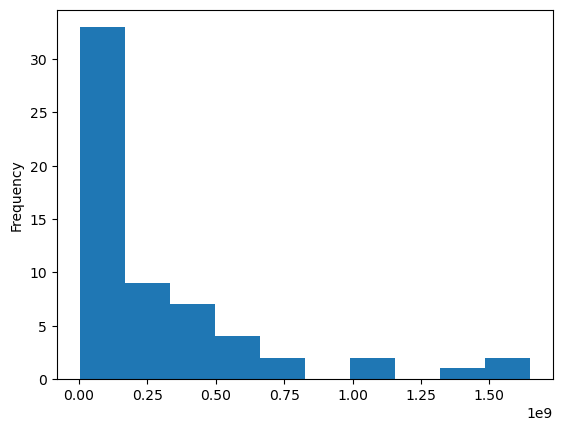

In [24]:
df['price'].plot.hist()